# Step #1 Load the Covid Data

In [2]:
# A tutorial for this file is available at www.relataly.com

# Setup Pakages
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import requests
import json
from pandas.plotting import register_matplotlib_converters

# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid.head()

,cases,deaths,cases_cum,deaths_cum
Date,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0


# Step #2 Load the Stock Market Data

In [3]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
asset_dict = {
    "^GSPC": "SP500",
    "DAX": "DAX",
    "^N225": "N225",
    "ES=F": "SP500FutJune20",
    "LHA.DE": "Lufthansa",
    "AAL": "AmericanAirlines",
    "NFLX": "Netflix",
    "AMZN": "Amazon",
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOG": "Google",
    "BTC-USD": "BTCUSD",
    "ETH-USD": "ETHUSD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    #"SM=F": "Soybean",
    "ZB=F": "UsTreasuryBond",
    "GBPEUR=X": "GBPEUR",
    "EURUSD=X": "EURUSD",
    "CHFEUR=X": "CHFEUR",
    "GBPUSD=X": "GBPUSD"}

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = web.DataReader(
            key, start=start_date, end=today_date, data_source="yahoo")
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.head()

^GSPC SP500
DAX DAX
^N225 N225
ES=F SP500FutJune20
LHA.DE Lufthansa
AAL AmericanAirlines
NFLX Netflix
AMZN Amazon
AAPL Apple
MSFT Microsoft
GOOG Google
BTC-USD BTCUSD
ETH-USD ETHUSD
CL=F Oil
GC=F Gold
ZB=F UsTreasuryBond
GBPEUR=X GBPEUR
EURUSD=X EURUSD
CHFEUR=X CHFEUR
GBPUSD=X GBPUSD


,cases,deaths,cases_cum,deaths_cum,SP500,DAX,N225,SP500FutJune20,Lufthansa,AmericanAirlines,...,Google,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,0,59,0,3246.280029,28.004999,23204.859375,3243.50,15.340,27.320000,...,1394.209961,7769.219238,144.304153,63.270000,1566.199951,157.84375,1.17169,1.116196,0.922110,1.308010
2020-01-07,0,0,59,0,3237.179932,27.955000,23575.720703,3235.25,15.365,27.219999,...,1393.339966,8163.692383,143.543991,62.700001,1571.800049,157.40625,1.17635,1.119799,0.922212,1.317003
2020-01-08,0,0,59,0,3253.050049,28.260000,23204.759766,3260.25,15.540,27.840000,...,1404.319946,8079.862793,141.258133,59.610001,1557.400024,156.37500,1.17551,1.115474,0.925181,1.311372
2020-01-09,0,0,59,0,3274.699951,28.450001,23739.869141,3276.00,16.160,27.950001,...,1419.829956,7879.071289,138.979202,59.560001,1551.699951,156.81250,1.17912,1.111321,0.924505,1.310513
2020-01-10,0,0,59,0,3265.350098,28.500000,23850.570312,3264.75,15.815,27.320000,...,1429.729980,8166.554199,143.963776,59.040001,1557.500000,157.62500,1.17620,1.111111,0.924796,1.307019


# Step #2 Plotting the Charts

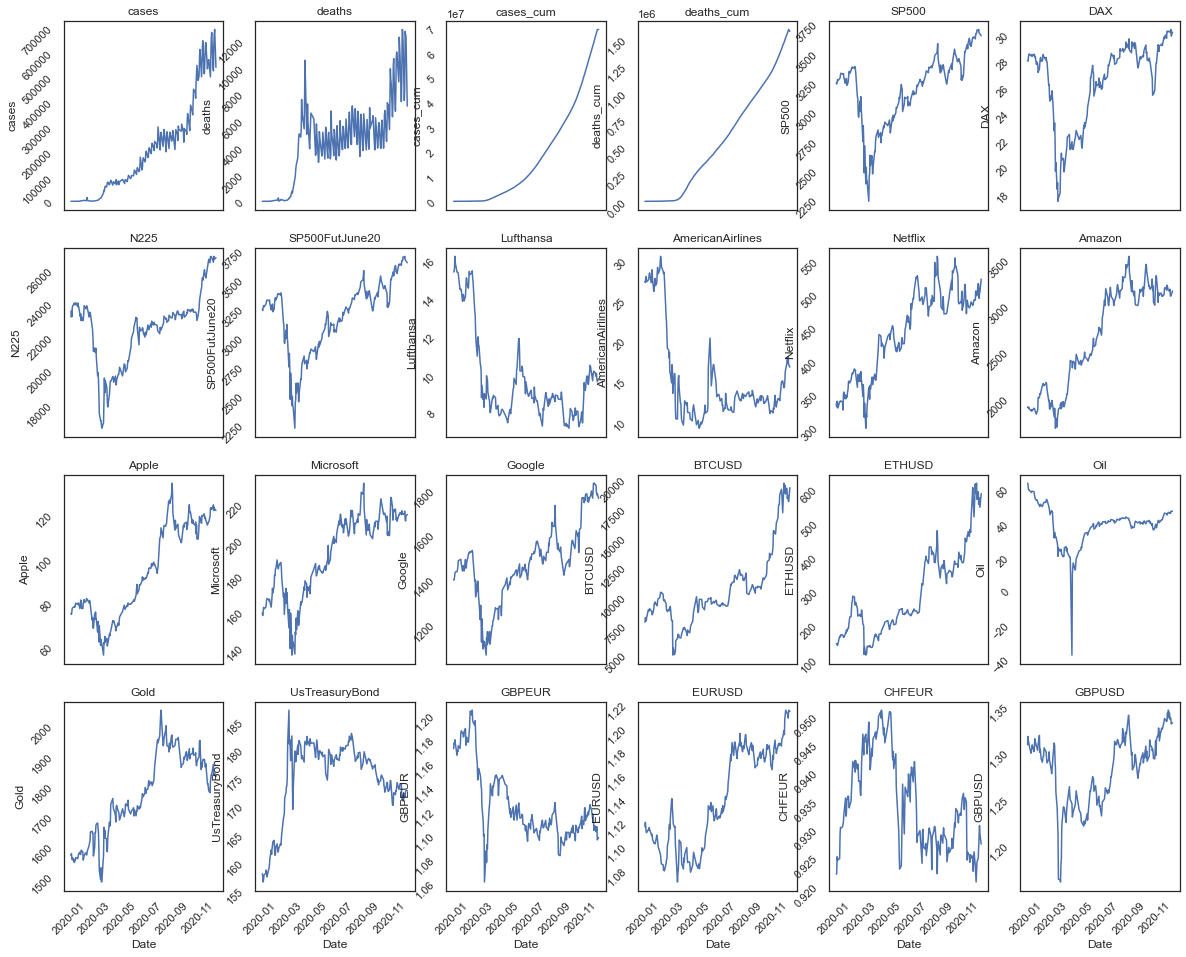

In [26]:
# Create lineplots
list_length = df_covid_new.shape[1]
ncols = 6
nrows = int(round(list_length / ncols, 0))
height = list_length/3 if list_length > 30 else 16

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(20, height))

for i, ax in enumerate(fig.axes):
        if i < list_length:
            sns.lineplot(data=df_covid_new, x=df_covid_new.index, y=df_covid_new.iloc[:, i], ax=ax)
            ax.set_title(df_covid_new.columns[i])
            ax.tick_params(labelrotation=45)

plt.show()

# Step #3 Create a Correlation Matrix

In [6]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,cases,deaths,cases_cum,deaths_cum,SP500,DAX,N225,SP500FutJune20,Lufthansa,AmericanAirlines,...,Google,BTCUSD,ETHUSD,Oil,Gold,UsTreasuryBond,GBPEUR,EURUSD,CHFEUR,GBPUSD
cases,1.000000,0.853512,0.972691,0.966481,0.663638,0.519676,0.660547,0.659832,-0.451801,-0.413463,...,0.796671,0.898456,0.899876,0.073393,0.719520,0.147347,-0.566227,0.843788,-0.538949,0.513913
deaths,0.853512,1.000000,0.778833,0.804270,0.399756,0.259080,0.400126,0.395697,-0.590251,-0.589090,...,0.567708,0.705201,0.718329,-0.228573,0.664476,0.399694,-0.574079,0.628463,-0.291254,0.245614
cases_cum,0.972691,0.778833,1.000000,0.974553,0.714616,0.571317,0.711905,0.711552,-0.379420,-0.325739,...,0.812816,0.922179,0.932026,0.142586,0.682001,0.059693,-0.516654,0.865846,-0.584541,0.584691
deaths_cum,0.966481,0.804270,0.974553,1.000000,0.712595,0.587606,0.681964,0.709312,-0.498761,-0.441631,...,0.808086,0.875724,0.925765,0.097746,0.805602,0.193165,-0.626253,0.902159,-0.603867,0.529622
SP500,0.663638,0.399756,0.714616,0.712595,1.000000,0.960100,0.956142,0.999766,0.140961,0.205127,...,0.944084,0.806056,0.801970,0.623960,0.553991,-0.359058,-0.043646,0.738902,-0.791377,0.853893
DAX,0.519676,0.259080,0.571317,0.587606,0.960100,1.000000,0.934535,0.960816,0.246646,0.304234,...,0.860881,0.678125,0.688038,0.715992,0.500840,-0.387279,-0.002362,0.685518,-0.844509,0.826270
N225,0.660547,0.400126,0.711905,0.681964,0.956142,0.934535,1.000000,0.956710,0.240638,0.281306,...,0.922091,0.829050,0.761729,0.655562,0.425364,-0.436453,-0.005655,0.673853,-0.790071,0.810057
SP500FutJune20,0.659832,0.395697,0.711552,0.709312,0.999766,0.960816,0.956710,1.000000,0.147155,0.211133,...,0.943475,0.804529,0.799886,0.627447,0.549565,-0.363198,-0.039701,0.736997,-0.792258,0.855152
Lufthansa,-0.451801,-0.590251,-0.379420,-0.498761,0.140961,0.246646,0.240638,0.147155,1.000000,0.964624,...,-0.006089,-0.135931,-0.296115,0.629831,-0.665533,-0.853762,0.815127,-0.388975,-0.107357,0.262015
AmericanAirlines,-0.413463,-0.589090,-0.325739,-0.441631,0.205127,0.304234,0.281306,0.211133,0.964624,1.000000,...,0.026610,-0.115151,-0.245080,0.658176,-0.603162,-0.877327,0.790366,-0.312451,-0.143469,0.330665


# Step #4 Visualizing the Matrix as a Heatpmap

<AxesSubplot:>

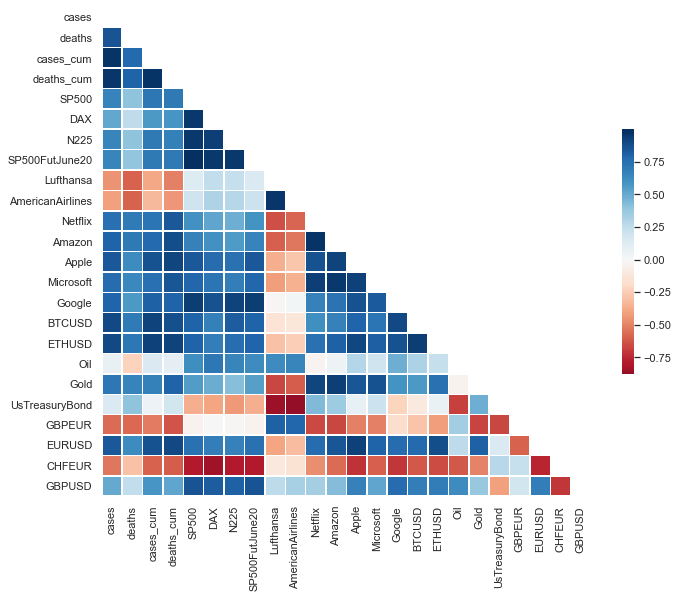

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)